Resonant values 2.6782 and 3.0734
Resonant values 2.8092 and 2.9758
Resonant values 2.7441 and 3.0273
Resonant values 2.8672 and 2.9241


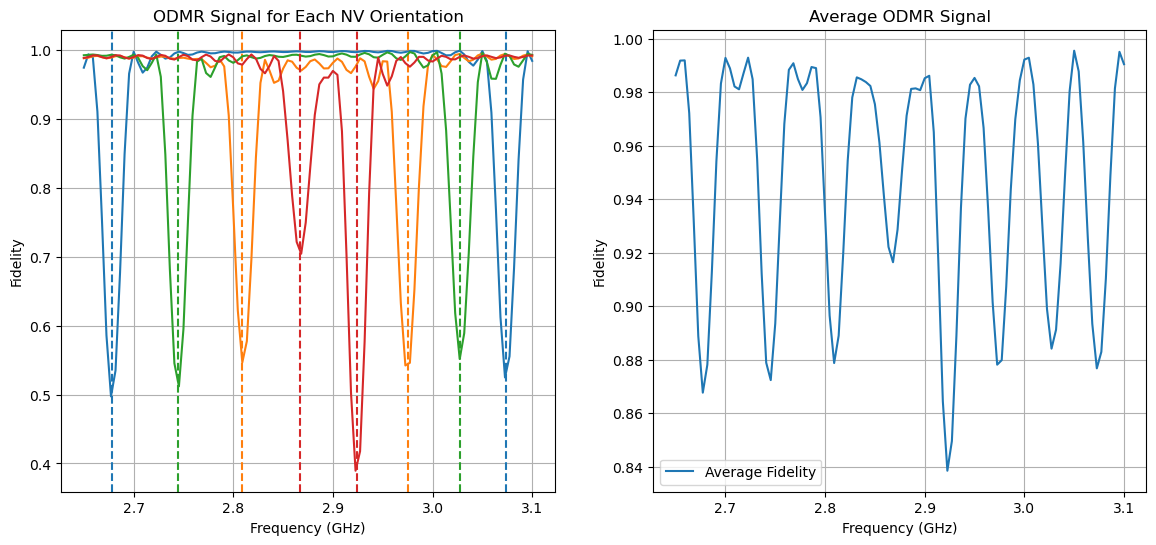

In [2]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
from ipywidgets import interact, SelectionSlider
from mytoolbox import *
import time

# Constants
D = 2.87  # Zero-field splitting in GHz
g_e = -28.03  # Gyromagnetic ratio of the electron in GHz/T
t = 2*np.pi*11.2*4  # Time for evolution in arbitrary units
n_evolution = 50  # Number of data points for numerical solution
initial_state = qt.basis(3, 1)
evolution_operator = qt.jmat(1, 'x')  # Using Sx as evolution operator

# Frequency range
frequencies = np.linspace(2.65, 3.1, 100)

# NV orientations
nv_orientations = [
    (1, 1, 1),
    (1, -1, -1),
    (-1, 1, -1),
    (-1, -1, 1)
]

# Magnetic field in Cartesian coordinates (example value)
B_field = [3.54 / 1000, 
           1.73 / 1000, 
           6.95 / 1000]  # Tesla

# Pulse amplitude
amp = 0.008

# Precompute fidelities and resonant frequencies for the given magnetic field and orientations
avg_fidelity = np.zeros(len(frequencies))
individual_fidelities = []
resonant_frequencies = []

for orientation in nv_orientations:
    # Calculate the ODMR signal (fidelity)
    fidelities = odmr_cartesian(D, g_e, B_field, orientation, frequencies, t, n_evolution, initial_state, evolution_operator, amp)
    individual_fidelities.append(fidelities)
    avg_fidelity += np.array(fidelities)
    
    # Compute the eigenvalues and resonant frequencies
    e0, em1, ep1 = compute_eigenvalues(D, g_e, orientation, B_field)
    resonant_frequencies.append((em1 - e0, ep1 - e0))
    print(f'Resonant values {em1 - e0:.4f} and {ep1 - e0:.4f}')

avg_fidelity /= len(nv_orientations)

# Plot the results
plt.figure(figsize=(14, 6))

# Plot individual fidelities with resonant frequencies as dashed lines
plt.subplot(1, 2, 1)
for i, fid in enumerate(individual_fidelities):
    color = plt.plot(frequencies, fid, label=f'Orientation {i + 1}')[0].get_color()
    
    # Add vertical dashed lines for resonant frequencies
    plt.axvline(resonant_frequencies[i][0], color=color, linestyle='--')
    plt.axvline(resonant_frequencies[i][1], color=color, linestyle='--')
    
plt.xlabel('Frequency (GHz)')
plt.ylabel('Fidelity')
plt.title('ODMR Signal for Each NV Orientation')
#plt.legend()
plt.grid(True)

# Plot average fidelity
plt.subplot(1, 2, 2)
plt.plot(frequencies, avg_fidelity, label='Average Fidelity')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Fidelity')
plt.title('Average ODMR Signal')
plt.legend()
plt.grid(True)

plt.show()

Resonant values 2.7180 and 3.0228
Resonant values 2.8088 and 2.9510
Resonant values 2.8254 and 2.9365
Resonant values 2.8560 and 2.9083


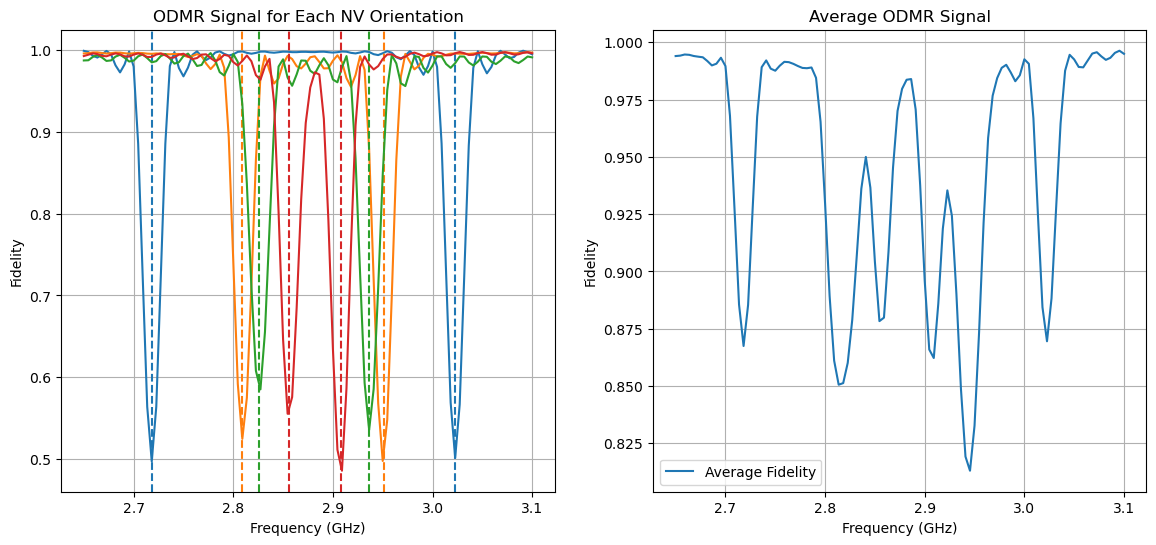

In [3]:
B = 5.53
polar = 45
azimuthal = 50

Bx = B * np.sin(np.radians(polar)) * np.cos(np.radians(azimuthal))
By = B * np.sin(np.radians(polar)) * np.sin(np.radians(azimuthal))
Bz = B * np.cos(np.radians(polar))

# Magnetic field in Cartesian coordinates (example value)
B_field = [Bx / 1000, 
           By / 1000, 
           Bz / 1000]  # Tesla

# Pulse amplitude
amp = 0.008

# Precompute fidelities and resonant frequencies for the given magnetic field and orientations
avg_fidelity = np.zeros(len(frequencies))
individual_fidelities = []
resonant_frequencies = []

for orientation in nv_orientations:
    # Calculate the ODMR signal (fidelity)
    fidelities = odmr_cartesian(D, g_e, B_field, orientation, frequencies, t, n_evolution, initial_state, evolution_operator, amp)
    individual_fidelities.append(fidelities)
    avg_fidelity += np.array(fidelities)
    
    # Compute the eigenvalues and resonant frequencies
    e0, em1, ep1 = compute_eigenvalues(D, g_e, orientation, B_field)
    resonant_frequencies.append((em1 - e0, ep1 - e0))
    print(f'Resonant values {em1 - e0:.4f} and {ep1 - e0:.4f}')

avg_fidelity /= len(nv_orientations)

# Plot the results
plt.figure(figsize=(14, 6))

# Plot individual fidelities with resonant frequencies as dashed lines
plt.subplot(1, 2, 1)
for i, fid in enumerate(individual_fidelities):
    color = plt.plot(frequencies, fid, label=f'Orientation {i + 1}')[0].get_color()
    
    # Add vertical dashed lines for resonant frequencies
    plt.axvline(resonant_frequencies[i][0], color=color, linestyle='--')
    plt.axvline(resonant_frequencies[i][1], color=color, linestyle='--')
    
plt.xlabel('Frequency (GHz)')
plt.ylabel('Fidelity')
plt.title('ODMR Signal for Each NV Orientation')
#plt.legend()
plt.grid(True)

# Plot average fidelity
plt.subplot(1, 2, 2)
plt.plot(frequencies, avg_fidelity, label='Average Fidelity')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Fidelity')
plt.title('Average ODMR Signal')
plt.legend()
plt.grid(True)

plt.show()

In [5]:
from ipywidgets import interact, SelectionSlider, VBox, HTML

# Define possible values for B (in millitesla), polar and azimuthal angles (in degrees), and amplitude
B_values = [0.1, 1, 2.5, 5.53, 7.99, 10, 20]  # B values in millitesla
polar_values = [0, 1, 5, 10, 30, 45 ,55, 60, 90]  # Polar angles in degrees
azimuthal_values = [0, 5, 10, 26, 45, 60, 90]  # Azimuthal angles in degrees
amp_values = [0.008]  # Pulse amplitude

# Frequency range
frequencies = np.linspace(2.5, 3.2, 100)

# Precompute fidelities and resonant frequencies for each combination
precomputed_fidelities = {}
for B in B_values:
    for polar in polar_values:
        for azimuthal in azimuthal_values:
            for amp in amp_values:
                Bx = B * np.sin(np.radians(polar)) * np.cos(np.radians(azimuthal))
                By = B * np.sin(np.radians(polar)) * np.sin(np.radians(azimuthal))
                Bz = B * np.cos(np.radians(polar))
                
                B_field = [Bx / 1000, By / 1000, Bz / 1000]  # Convert to Tesla
                
                avg_fidelity = np.zeros(len(frequencies))
                individual_fidelities = []
                resonant_frequencies = []

                for orientation in nv_orientations:
                    fidelities = odmr_cartesian(D, g_e, B_field, orientation, frequencies, t, n_evolution, initial_state, evolution_operator, amp)
                    individual_fidelities.append(fidelities)
                    avg_fidelity += np.array(fidelities)

                    e0, em1, ep1 = compute_eigenvalues(D, g_e, orientation, B_field)
                    resonant_frequencies.append((em1 - e0, ep1 - e0))

                avg_fidelity /= len(nv_orientations)
                precomputed_fidelities[(B, polar, azimuthal, amp)] = (individual_fidelities, avg_fidelity, resonant_frequencies)

# Function to plot the precomputed ODMR spectra based on slider values
def plot_odmr(B, polar, azimuthal, amp):
    key = (B, polar, azimuthal, amp)
    
    if key not in precomputed_fidelities:
        print(f"Combination (B={B}, polar={polar}, azimuthal={azimuthal}, amp={amp}) not precomputed.")
        return
    
    individual_fidelities, avg_fidelity, resonant_frequencies = precomputed_fidelities[key]

    plt.figure(figsize=(14, 6))

    # Plot individual fidelities with resonant frequencies as dashed lines
    plt.subplot(1, 2, 1)
    for i, fid in enumerate(individual_fidelities):
        color = plt.plot(frequencies, fid, label=f'Orientation {i + 1}')[0].get_color()
        plt.axvline(resonant_frequencies[i][0], color=color, linestyle='--')
        plt.axvline(resonant_frequencies[i][1], color=color, linestyle='--')

    plt.xlabel('Frequency (GHz)')
    plt.ylabel('Fidelity')
    plt.title('ODMR Signal for Each NV Orientation')
    plt.grid(True)

    # Plot average fidelity
    plt.subplot(1, 2, 2)
    plt.plot(frequencies, avg_fidelity, label='Average Fidelity')
    plt.xlabel('Frequency (GHz)')
    plt.ylabel('Fidelity')
    plt.title('Average ODMR Signal')
    plt.legend()
    plt.grid(True)

    plt.show()

    # Create HTML for displaying resonant frequencies
    res_freq_text = "<b>Resonant Frequencies (GHz):</b><br>"
    for i, (f1, f2) in enumerate(resonant_frequencies):
        res_freq_text += f"Orientation {i + 1} frequencies: {f1:.3f}, {f2:.3f}<br>"

    return HTML(res_freq_text)

# Create sliders for B, polar, azimuthal, and amplitude using SelectionSlider
B_slider = SelectionSlider(options=B_values, value=B_values[0], description='B (mT)')
polar_slider = SelectionSlider(options=polar_values, value=polar_values[0], description='Polar (°)')
azimuthal_slider = SelectionSlider(options=azimuthal_values, value=azimuthal_values[0], description='Azimuthal (°)')
amp_slider = SelectionSlider(options=amp_values, value=amp_values[0], description='Amplitude')

# Create interactive plot with sliders
interact(plot_odmr, B=B_slider, polar=polar_slider, azimuthal=azimuthal_slider, amp=amp_slider)

interactive(children=(SelectionSlider(description='B (mT)', options=(0.1, 1, 2.5, 5.53, 7.99, 10, 20), value=0…

<function __main__.plot_odmr(B, polar, azimuthal, amp)>

Ideally: 

2.68 - 3.07

2.86 - 2.93

2.73 - 3.03

2.82 - 2.96